In [1]:
# foto splitsen in 4 van 32x32
# 

from SimpleCV import *
from IPython.display import HTML
import matplotlib as plt
import matplotlib.image as mpimg
import pandas as pd
import cv2
import glob

In [2]:
disp = Display(displaytype='notebook')
size = 32

imagelist = []

# get all files and add them to tuple with the postal codes
for filename in glob.glob("../dataset-images/*.png"): 
    image = Image(filename)
    image = image.binarize().dilate()
    answer = filename[18:22]
    imagelist.append((answer, image))
    
numbers = []

# seperate individual number images with the number
for image in imagelist:
    for i in range(4):
        digit = image[0][(0 if i+1 == 1 else i):i+1]
        numbers.append((digit, image[1].crop(i*size, 0, size, size*(i+1) )))

In [11]:
# divide number images into pieces of 4x4 and create matrix
def createMatrix(image):
    size = 8
    m = np.zeros((4,4))

    pieces = []
    for y in range(4):
        for x in range(4):
            crop = image.crop(x*size, y*size, size, size)
            pieces.append(crop)
            m[x][y] = 1 if crop.meanColor()[0] > 80 else 0

    return m.T

In [12]:
def getBlobInfo(image):
    image.show()
    blobs = image.findBlobs()
    image.draw(blobs, autocolor=True)
    return blobs[0]

In [38]:
numbersDict = {
    "matrix_top_row": [],
    "matrix_second_row": [],
    "matrix_third_row": [],
    "matrix_bottom_row": [],
    "blob_area" : [],
    "blob_centroid_x" : [],
    "blob_centroid_y" : [],
    "blob_angle" : [],
    "blob_height": [],
    "blob_width": [],
    "label" : []
}

for number in numbers:
    image = number[1]
    blob = getBlobInfo(image)
    matrix = createMatrix(image)
    numbersDict["matrix_top_row"].append(sum(matrix[0]))
    numbersDict["matrix_second_row"].append(sum(matrix[1]))
    numbersDict["matrix_third_row"].append(sum(matrix[2]))
    numbersDict["matrix_bottom_row"].append(sum(matrix[3]))
    numbersDict["blob_area"].append(blob.area())
    numbersDict["blob_centroid_x"].append(blob.centroid()[0])
    numbersDict["blob_centroid_y"].append(blob.centroid()[1])
    numbersDict["blob_angle"].append(blob.angle())
    numbersDict["blob_height"].append(blob.height())
    numbersDict["blob_width"].append(blob.width())
    numbersDict["label"].append(number[0])
   
df = pd.DataFrame(numbersDict)
df = df[["matrix_top_row", 
         "matrix_second_row", 
         "matrix_third_row", 
         "matrix_bottom_row", 
         "blob_area", 
         "blob_centroid_x", 
         "blob_centroid_y",
         "blob_angle",
         "blob_height",
         "blob_width",
         "label"]]
df = df.sort_values("label")

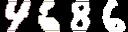

[ 363.5  380.5  423.5  502.5]


In [385]:
# TEST : 4686: too many blobs

testImage = Image("../dataset-images/4686.png")
testImage = testImage.binarize().dilate()
blobs = testImage.findBlobs()
testImage.draw(blobs, autocolor=True)
testImage.save(disp)
print blobs.area()

testNums = []

for i in range(4):
    testNums.append(testImage.crop(i*size, 0, size, size*(i+1) ))

In [39]:
df.to_csv("../dataset-numpy/dataset_features.csv", sep=',', encoding='utf-8')